In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

In [32]:
# Load both the files
data = pd.read_csv(r"D:\Assesment\Research methodology\Main Dataset\Diabetes Dataset.csv")

In [33]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


### Data Pre-processing & Data Analysis

In [34]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [35]:
data.shape

(100000, 9)

In [36]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [37]:
data['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [38]:
data['hypertension'].value_counts()

hypertension
0    92515
1     7485
Name: count, dtype: int64

In [39]:
data['heart_disease'].value_counts()

heart_disease
0    96058
1     3942
Name: count, dtype: int64

In [40]:
data['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [41]:
data['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [42]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [43]:
data.duplicated().sum()

np.int64(3854)

In [44]:
data.drop_duplicates(inplace=True)

In [45]:
data.duplicated().sum()

np.int64(0)

In [46]:
data['smoking_history'] = data['smoking_history'].replace({'not current':'Former', 'former':'Former','current':'Current', 'never':'Never', 'ever':'Never'})

In [47]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,Never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,Never,27.32,5.7,158,0
3,Female,36.0,0,0,Current,23.45,5.0,155,0
4,Male,76.0,1,1,Current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,Former,27.83,5.7,155,0
99998,Female,24.0,0,0,Never,35.42,4.0,100,0


In [48]:
data['smoking_history'].value_counts()

smoking_history
Never      38396
No Info    32887
Former     15666
Current     9197
Name: count, dtype: int64

In [49]:
no_info_diabetes = data[(data['smoking_history'] == 'No Info') & (data['diabetes'] == 1)]

In [50]:
no_info_diabetes_count = no_info_diabetes.shape[0]

In [51]:
data['smoking_history'].mode()[0]

'Never'

In [52]:
data['smoking_history'] = data['smoking_history'].replace('No Info', data['smoking_history'].mode()[0])

Text(0.5, 0, 'Heart Disease (0 = No, 1 = Yes)')

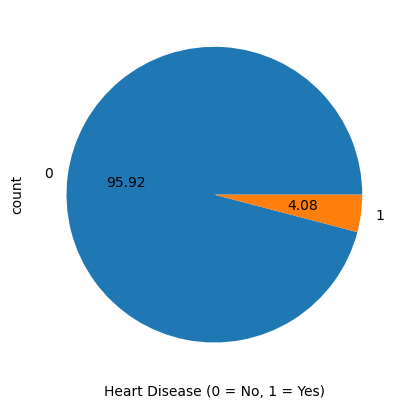

In [53]:
data['heart_disease'].value_counts().plot(kind='pie', autopct='%.2f')
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")

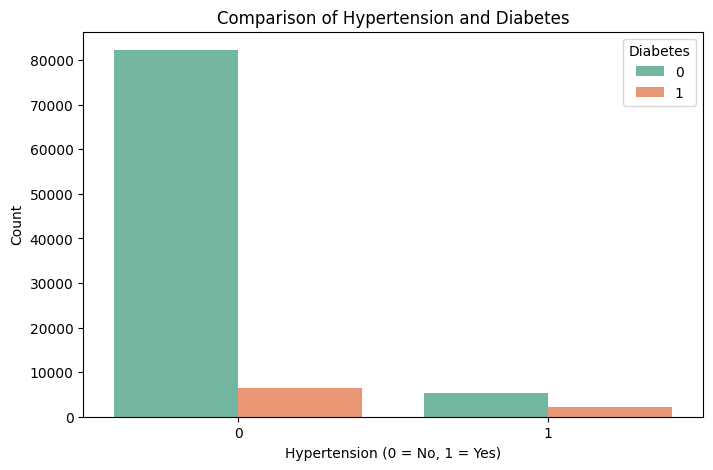

In [54]:
plt.figure(figsize=(8, 5))
sns.countplot(x="hypertension", hue='diabetes', data=data, palette="Set2")
plt.title("Comparison of Hypertension and Diabetes")
plt.xlabel("Hypertension (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Diabetes", loc="upper right")
plt.show()

In [55]:
from sklearn.preprocessing import LabelEncoder
cols = ['gender', 'smoking_history']
lbl = LabelEncoder()
for col in cols:
    data[col] = lbl.fit_transform(data[col])

<Axes: ylabel='count'>

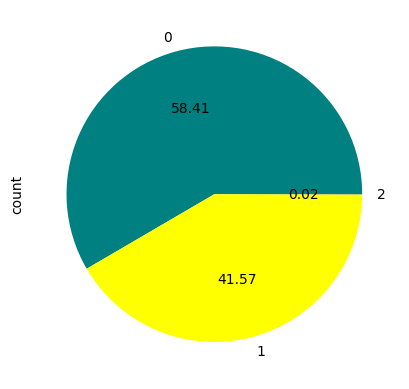

In [56]:
data['gender'].value_counts().plot(kind='pie', autopct='%.2f', colors=["teal", "yellow", "blue"])

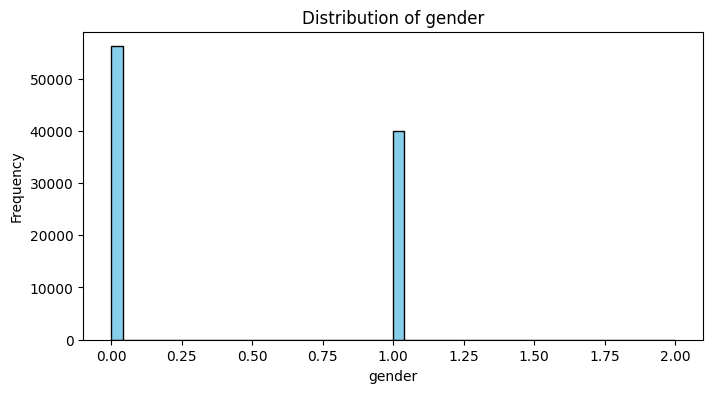

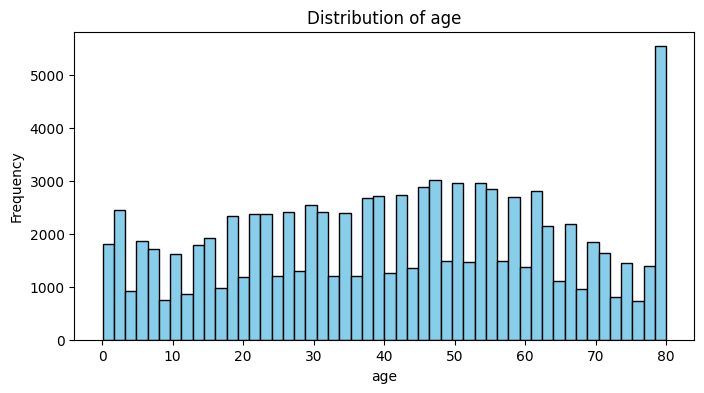

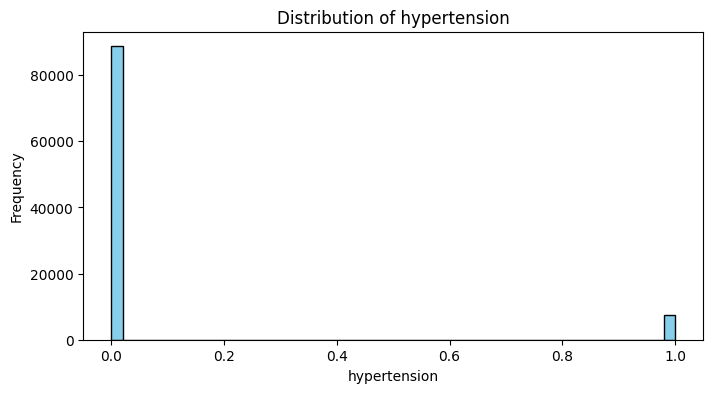

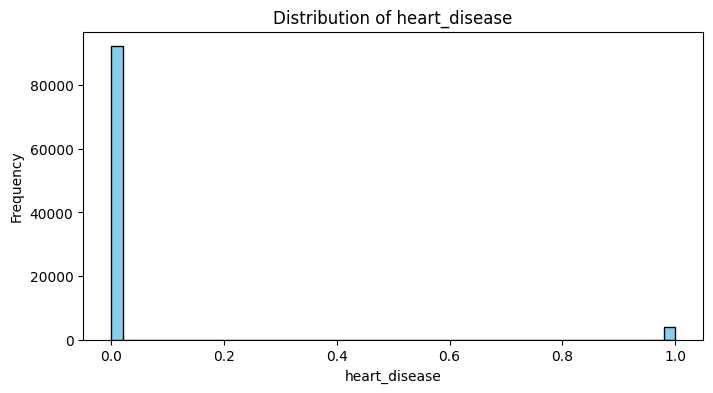

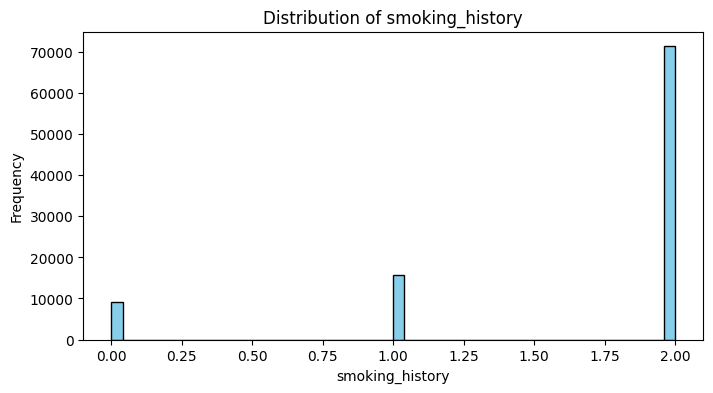

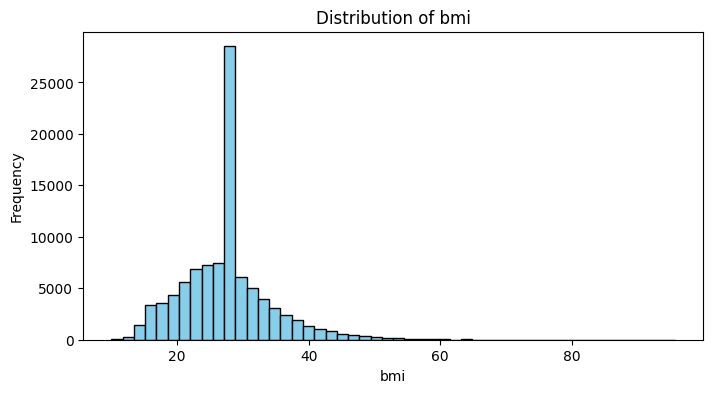

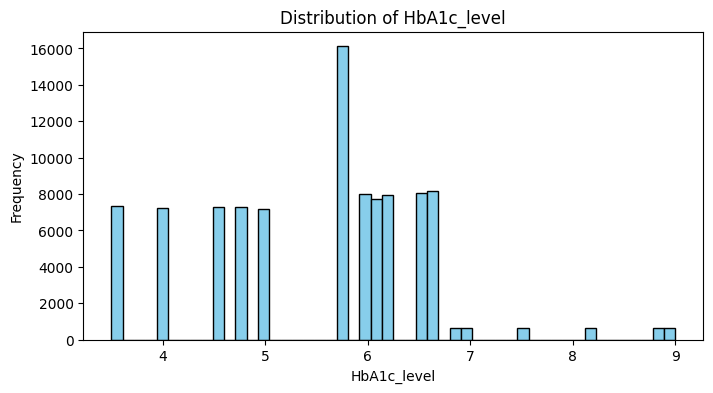

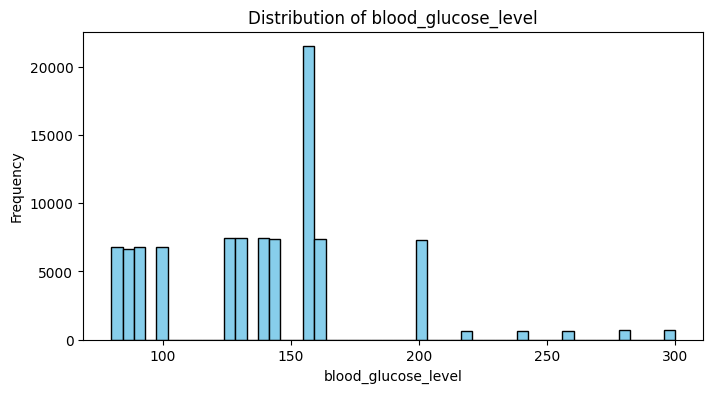

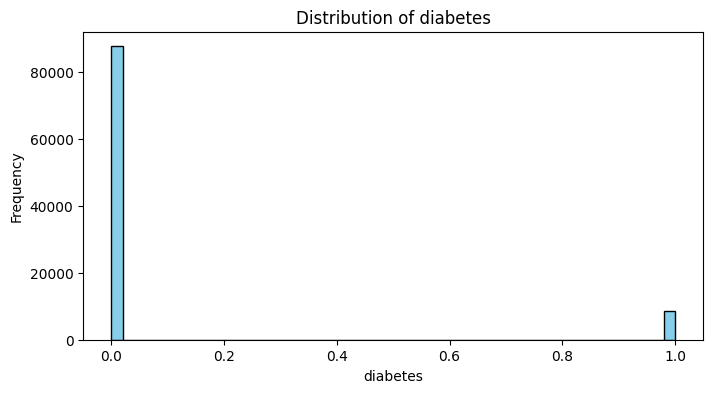

In [57]:
# Histogram for each numeric column
import matplotlib.pyplot as plt

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(data[column].dropna(), bins=50, color="skyblue", edgecolor="black")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


In [58]:
# Categorical column analysis with count plot
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=data[column], palette="pastel", edgecolor="black")
    plt.title(f"Count Plot of {column}")
    plt.xticks(rotation=45)
    plt.show()

    # Display value counts
    print(f"\n Value Counts for {column}:")
    print(data[column].value_counts())


<Axes: xlabel='diabetes', ylabel='age'>

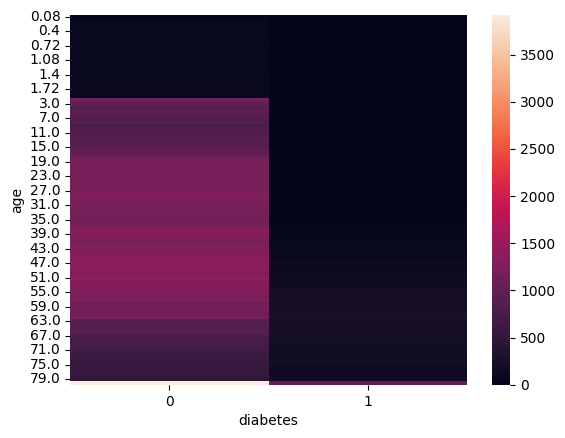

In [59]:
sns.heatmap(pd.crosstab(data['age'], data['diabetes']))

In [60]:
# sns.pairplot(x=data[''], hue='diabetes')

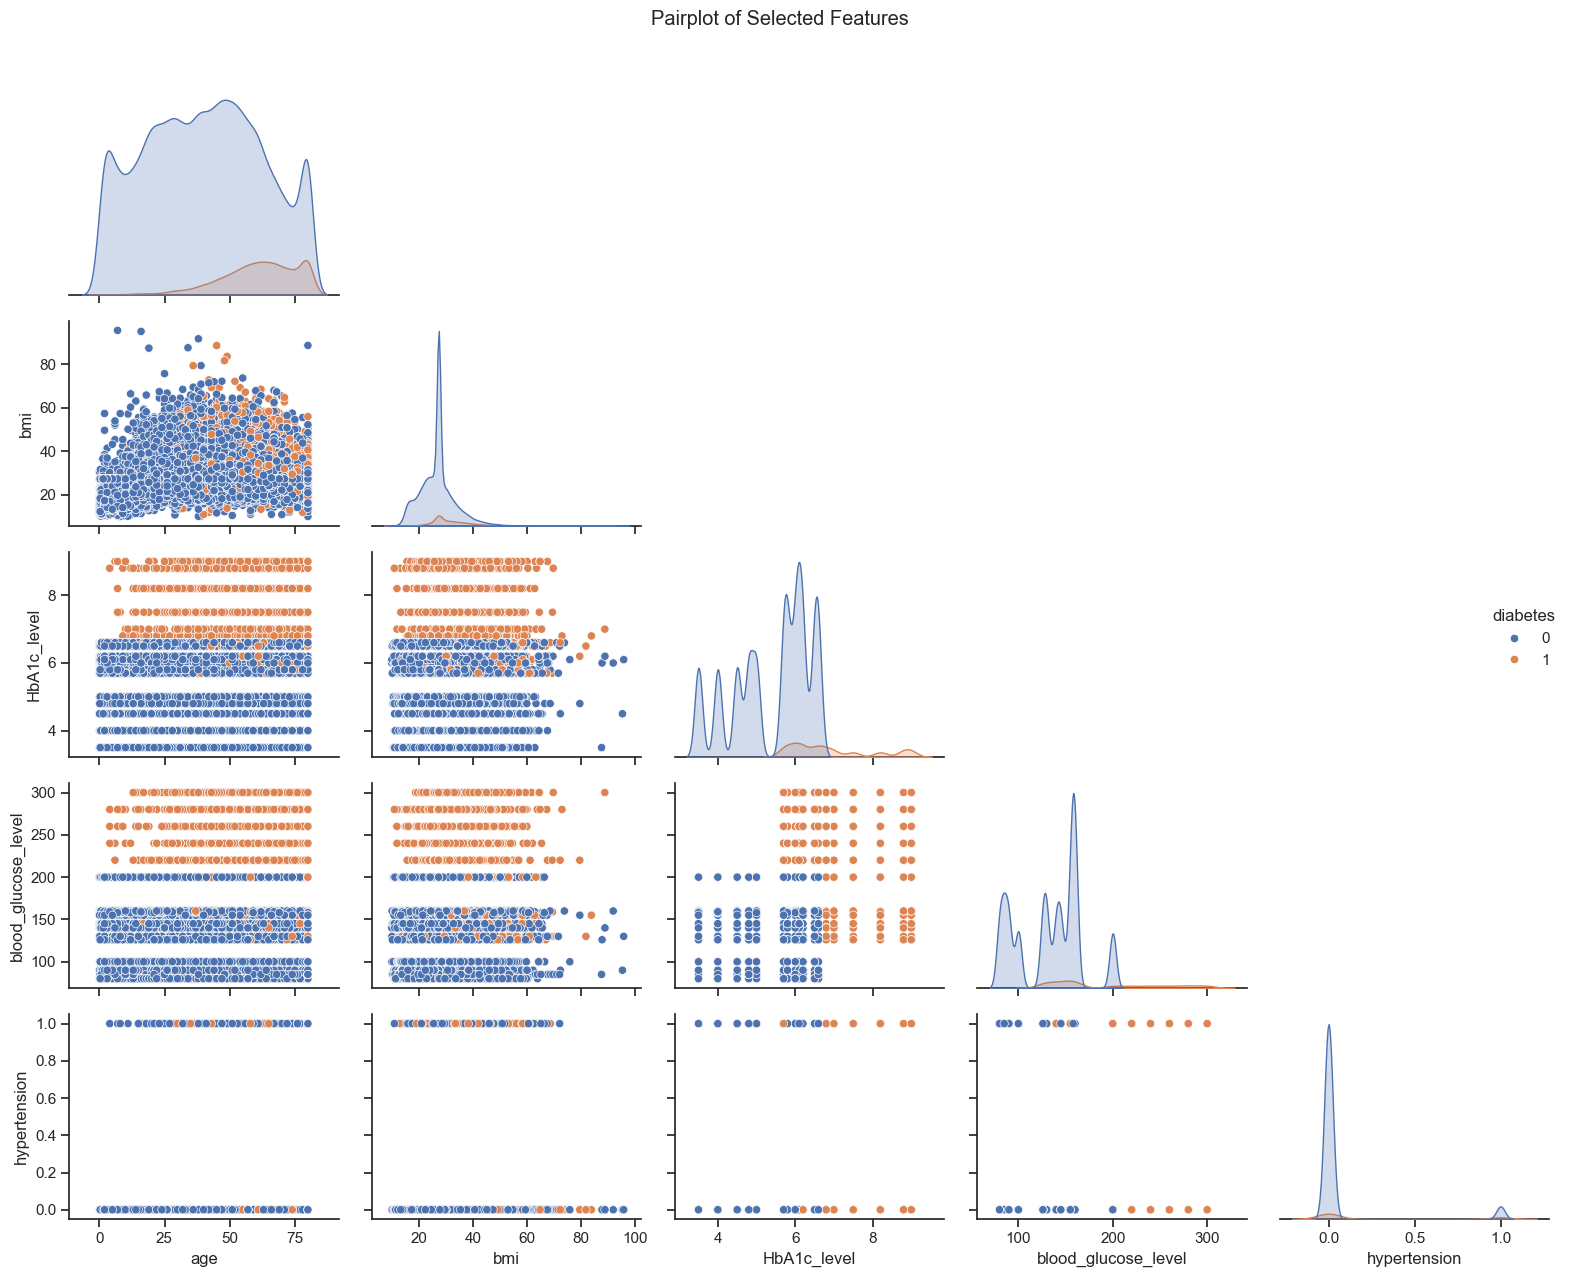

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: choose a subset of important features
selected_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'diabetes']

# Assuming 'df' is your DataFrame
sns.set(style='ticks')

# Create pairplot
pair = sns.pairplot(data[selected_features], hue='diabetes', height=2.5, aspect=1.2, corner=True)

# Improve layout
pair.fig.suptitle("Pairplot of Selected Features", y=1.02)  # title
plt.tight_layout()
plt.show()


In [62]:
columns_boxplot = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

In [63]:
def display_box_plots(data, columns_boxplot):
    # Set the plot size
    plt.figure(figsize=(15, 10))
    
    # Loop through all numerical columns in the dataset
    for column in columns_boxplot:
        # Create a new figure for each box plot
        plt.figure(figsize=(8, 5))
        
        # Create a box plot for the current column
        sns.boxplot(data=data[column], color='skyblue')
        
        # Add a title and labels
        plt.title(f'Box Plot of {column}', fontsize=16)
        plt.xlabel(column, fontsize=12)
        
        # Show the plot
        plt.show()

<Figure size 1500x1000 with 0 Axes>

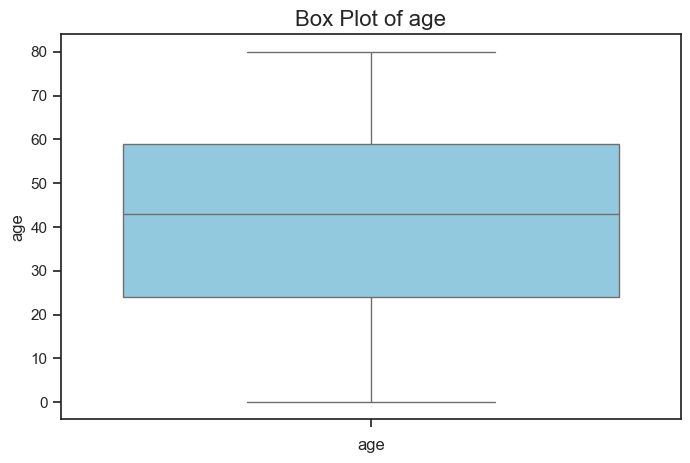

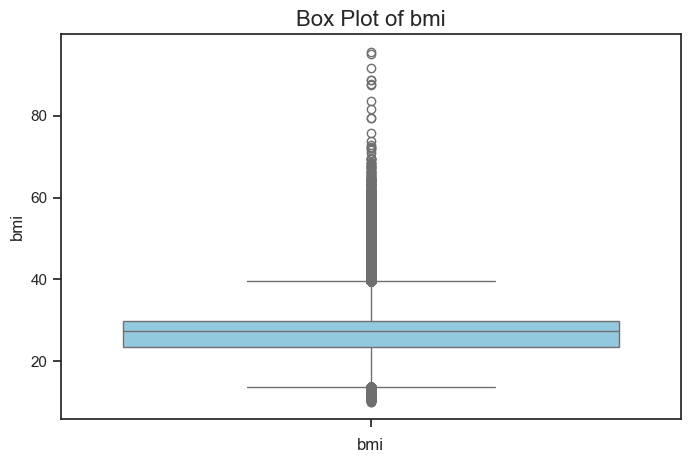

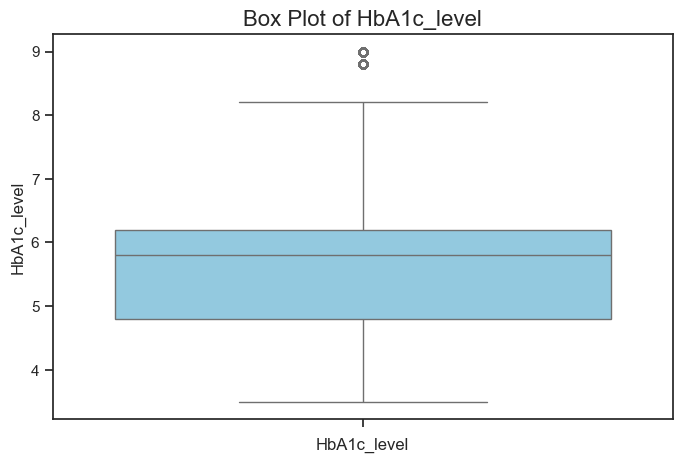

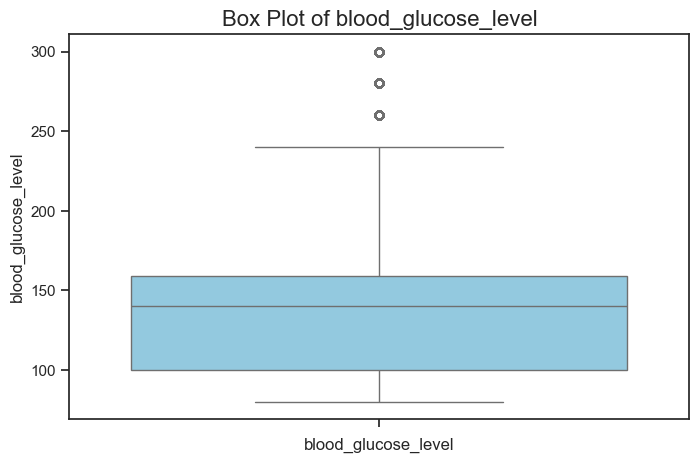

In [64]:
display_box_plots(data, columns_boxplot)

In [65]:
# Funcation for outlier detection
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [66]:
columns_to_check = ['bmi', 'HbA1c_level', 'blood_glucose_level']

In [67]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,2,25.19,6.6,140,0
1,0,54.0,0,0,2,27.32,6.6,80,0
2,1,28.0,0,0,2,27.32,5.7,158,0
3,0,36.0,0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,0,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,2,24.60,4.8,145,0
99996,0,2.0,0,0,2,17.37,6.5,100,0
99997,1,66.0,0,0,1,27.83,5.7,155,0
99998,0,24.0,0,0,2,35.42,4.0,100,0


In [68]:
data.shape

(96146, 9)

In [69]:
for col in columns_to_check:
    data = remove_outliers(data, col)


In [70]:
data.shape

(88195, 9)

In [71]:
# encoding the categorical data
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
cols = data[['gender', 'smoking_history']]

for col in cols:
    data[col] = lbl.fit_transform(data[col])

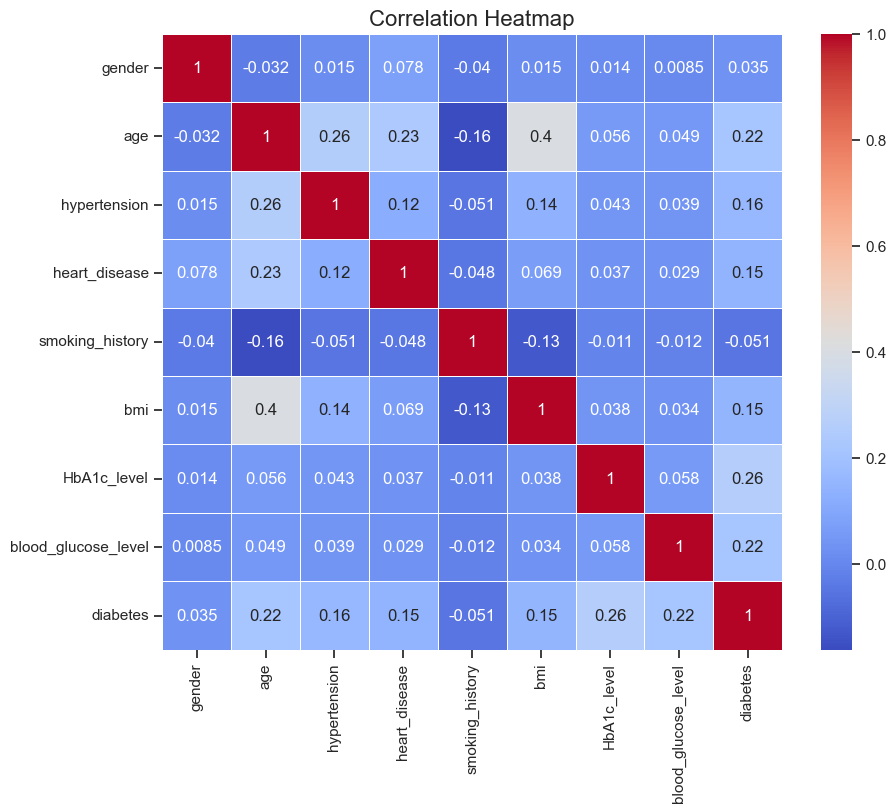

In [72]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [73]:
def pairplot_visualization(data, hue_col='diabetes'):
    sns.pairplot(data, hue=hue_col, diag_kind='kde', palette='coolwarm')
    plt.suptitle('Pair Plot of Key Features', y=1.02, fontsize=16)
    plt.show()

In [74]:
# pairplot_visualization(data[['blood_glucose_level', 'bmi', 'age', 'diabetes']])

In [75]:
# boxplot_features(data, ['blood_glucose_level', 'bmi', 'age'])

In [76]:
# Split the dataset into features (X) and target (y)
X = data.drop('diabetes', axis=1)
y = data['diabetes']

In [77]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:
# # Standardize the data (for better performance of some algorithms)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Simple Claasifiers Implementation

In [80]:
# Extreme Gradient Boosting (XGBoost)
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [81]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

In [83]:
ann_model = Sequential()

# Input layer + First hidden layer
ann_model.add(Dense(units=32, activation='relu', input_dim=X_train_scaled.shape[1]))

# Second hidden layer
ann_model.add(Dense(units=16, activation='relu'))

# Output layer
ann_model.add(Dense(units=1, activation='sigmoid'))

In [84]:
# Compile the model
ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [85]:
# Train the model
history = ann_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/50
2205/2205 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9476 - loss: 0.2004 - val_accuracy: 0.9602 - val_loss: 0.1147
Epoch 2/50
2205/2205 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9593 - loss: 0.1156 - val_accuracy: 0.9602 - val_loss: 0.1140
Epoch 3/50
2205/2205 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9592 - loss: 0.1152 - val_accuracy: 0.9606 - val_loss: 0.1115
Epoch 4/50
2205/2205 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9606 - loss: 0.1110 - val_accuracy: 0.9612 - val_loss: 0.1092
Epoch 5/50
2205/2205 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9617 - loss: 0.1062 - val_accuracy: 0.9557 - val_loss: 0.1182
Epoch 6/50
2205/2205 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9635 - loss: 0.1049 - val_accuracy: 0.9640 - val_loss: 0.1047
Epoch 7/50
2205/2205 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9637 - loss: 0.1031 - val_accuracy: 0.9633 - val_loss: 0.1056
Epoch 8/50
2205/2205 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9656 - loss: 0.1010 -

In [86]:
# Predicting
y_pred_ann = ann_model.predict(X_test_scaled)
y_pred_ann = (y_pred_ann > 0.5).astype(int).flatten()

552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [87]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_ann))
print("\n Classification Report:\n", classification_report(y_test, y_pred_ann))

Accuracy: 0.9713135665287148

 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     16719
           1       0.97      0.47      0.63       920

    accuracy                           0.97     17639
   macro avg       0.97      0.73      0.81     17639
weighted avg       0.97      0.97      0.97     17639



In [88]:
# Model Evaluation 
def evaluate_model(y_test, y_pred, model_name):
    print(f'--- {model_name} ---')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print(f'Precision: {precision_score(y_test, y_pred):.4f}')
    print(f'Recall: {recall_score(y_test, y_pred):.4f}')
    print(f'F1-Score: {f1_score(y_test, y_pred):.4f}')
    print(f'ROC-AUC: {roc_auc_score(y_test, y_pred):.4f}')
    print('Confusion Matrix:')
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Plot Confusion Matrix
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    # plt.title(f'{model_name} - Confusion Matrix')
    # plt.ylabel('Actual')
    # plt.xlabel('Predicted')
    # plt.show()

    # Plot ROC Curve
    # fpr, tpr, _ = roc_curve(y_test, y_pred)
    # plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_pred):.2f})')
    # plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.title(f'{model_name} - ROC Curve')
    # plt.legend(loc='best')
    # plt.show()

### Evaluate all Simple Models

In [89]:
# XGBoost
evaluate_model(y_test, y_pred_xgb, 'XGBoost')

--- XGBoost ---
Accuracy: 0.9709
Precision: 0.9248
Recall: 0.4815
F1-Score: 0.6333
ROC-AUC: 0.7397
Confusion Matrix:
[[16683    36]
 [  477   443]]


In [90]:
# # Assuming y_test are the true labels and y_pred are the predicted labels
# cm = confusion_matrix(y_test, y_pred_xgb)

# plt.figure(figsize=(6, 5))
# ConfusionMatrixDisplay(cm).plot(cmap='Blues')
# plt.title("Confusion Matrix")
# plt.show()


In [91]:
# Random Forest
evaluate_model(y_test, y_pred_rf, 'Random Forest')

--- Random Forest ---
Accuracy: 0.9692
Precision: 0.8760
Recall: 0.4761
F1-Score: 0.6169
ROC-AUC: 0.7362
Confusion Matrix:
[[16657    62]
 [  482   438]]


In [92]:
# ANN
evaluate_model(y_test, y_pred_ann, 'ANN')

--- ANN ---
Accuracy: 0.9713
Precision: 0.9683
Recall: 0.4652
F1-Score: 0.6285
ROC-AUC: 0.7322
Confusion Matrix:
[[16705    14]
 [  492   428]]


In [93]:
models = ['XGBoost', 'Random Forest', 'Artificial Neural Network']

accuracies = [
    accuracy_score(y_test, y_pred_xgb),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_ann),
]

f1_scores = [
    f1_score(y_test, y_pred_xgb),
    f1_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_ann),
]


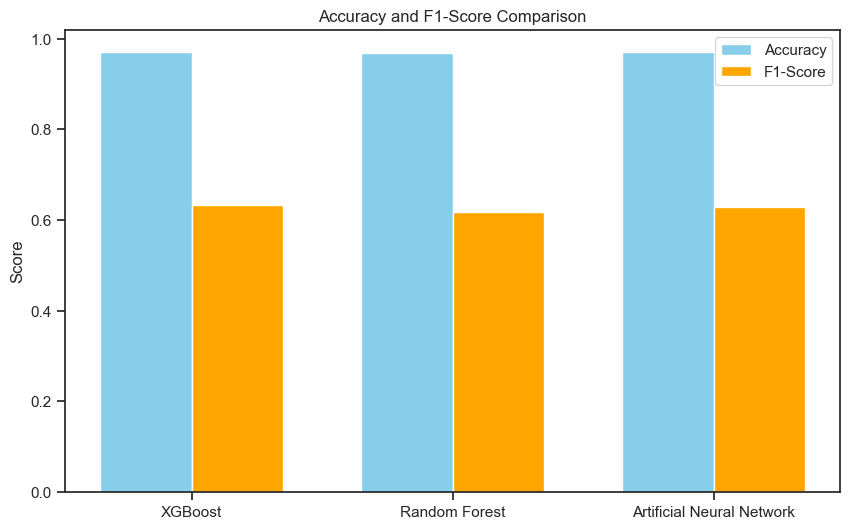

In [94]:
def plot_accuracy_f1(models, accuracies, f1_scores):

    # Plots a bar chart comparing Accuracy and F1-Scores for all models.
    
    import matplotlib.pyplot as plt
    import numpy as np

    x = np.arange(len(models))
    width = 0.35

    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, accuracies, width, label='Accuracy', color='skyblue')
    plt.bar(x + width/2, f1_scores, width, label='F1-Score', color='orange')
    plt.xticks(x, models)
    plt.ylabel('Score')
    plt.title('Accuracy and F1-Score Comparison')
    plt.legend()
    plt.show()
plot_accuracy_f1(models, accuracies, f1_scores)

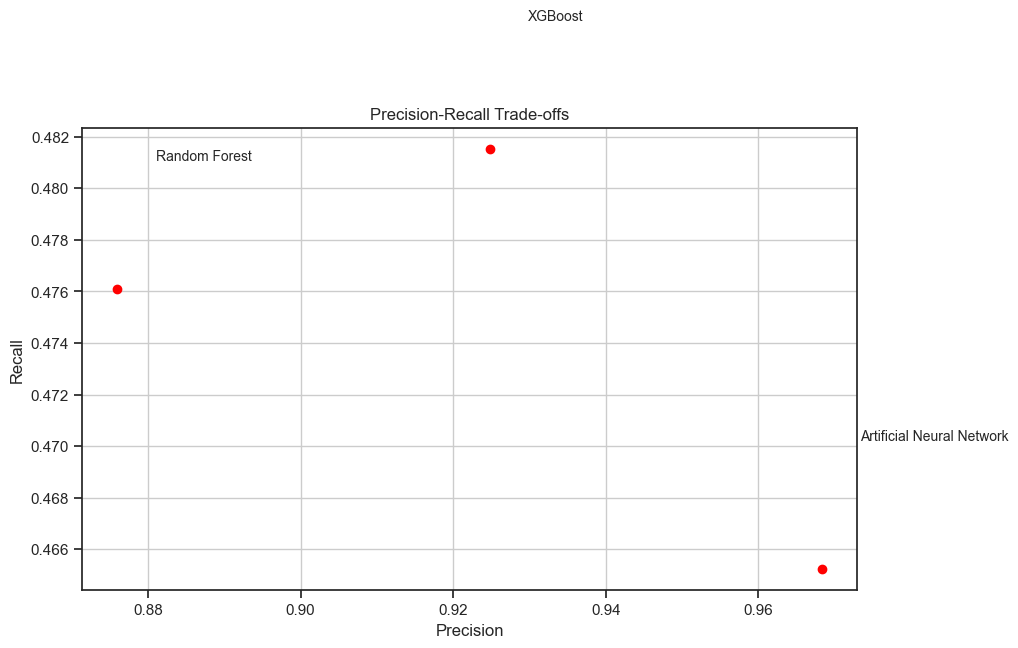

In [95]:
def plot_precision_recall(models, precisions, recalls):
    """
    Plots a scatter plot comparing Precision and Recall for all models.
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.scatter(precisions, recalls, color='red', label='Models')
    for i, model in enumerate(models):
        plt.text(precisions[i] + 0.005, recalls[i] + 0.005, model, fontsize=10)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title('Precision-Recall Trade-offs')
    plt.grid(True)
    plt.show()

    
precisions = [
    precision_score(y_test, y_pred_xgb),
    precision_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_ann),
]

recalls = [
    recall_score(y_test, y_pred_xgb),
    recall_score(y_test, y_pred_rf),
    recall_score(y_test, y_pred_ann)
]

plot_precision_recall(models, precisions, recalls)


552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


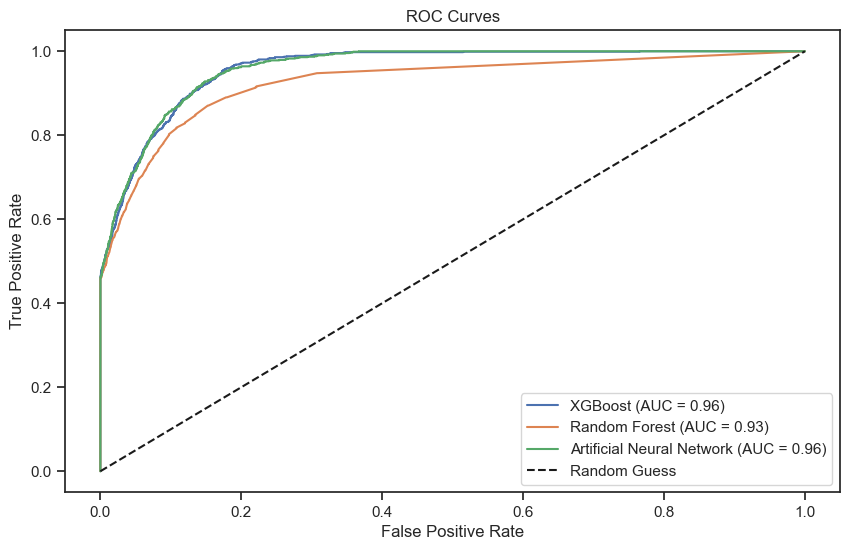

In [96]:
def plot_roc_curves(models, y_test, probabilities):
    """
    Plots ROC curves for all models.
    """
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, roc_auc_score

    plt.figure(figsize=(10, 6))
    for i, model in enumerate(models):
        fpr, tpr, _ = roc_curve(y_test, probabilities[i])
        auc = roc_auc_score(y_test, probabilities[i])
        plt.plot(fpr, tpr, label=f'{model} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc='best')
    plt.show()

probabilities = [
    xgb_model.predict_proba(X_test_scaled)[:, 1],
    rf_model.predict_proba(X_test_scaled)[:, 1],
    ann_model.predict(X_test_scaled).flatten()
]

plot_roc_curves(models, y_test, probabilities)


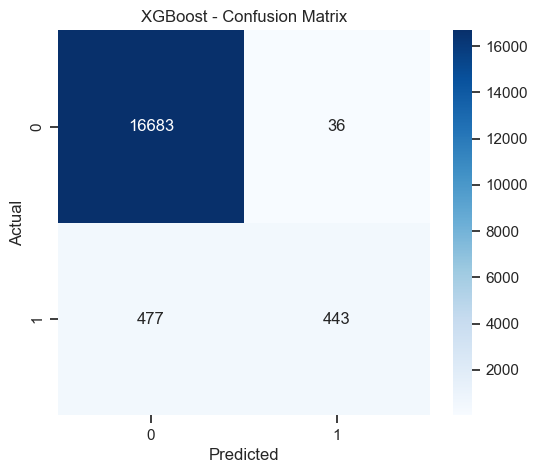

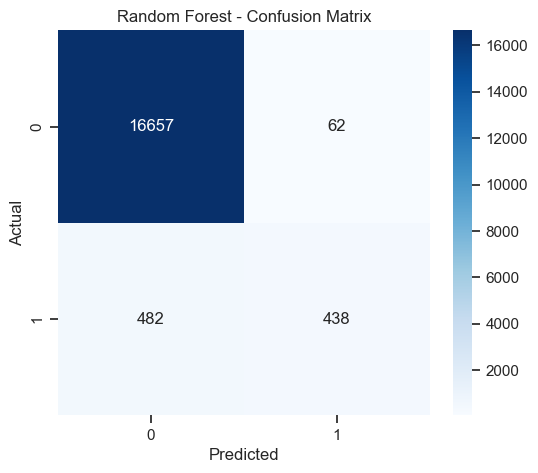

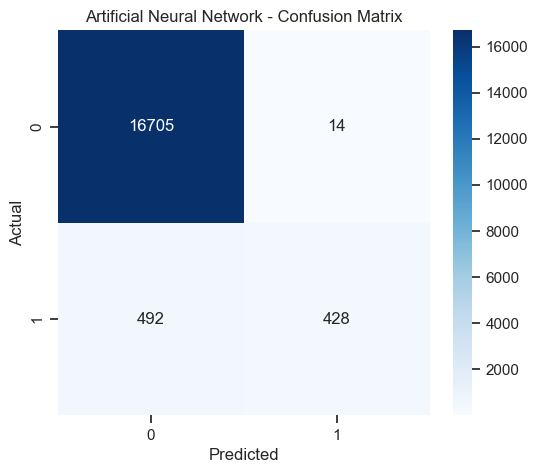

In [97]:
def plot_confusion_matrices(models, y_test, predictions):
    """
    Plots confusion matrix heatmaps for all models.
    """
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    for i, model in enumerate(models):
        cm = confusion_matrix(y_test, predictions[i])
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'{model} - Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()




predictions = [y_pred_xgb, y_pred_rf, y_pred_ann]

plot_confusion_matrices(models, y_test, predictions)


## Bayesian Optimization Implementation

#### XGBoost

In [98]:
import optuna

def objective_xgb(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }

    model = XGBClassifier(**params)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    return accuracy_score(y_test, preds)


In [99]:
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=20)

print("Best Accuracy:", study_xgb.best_value)
print("Best Hyperparameters:", study_xgb.best_params)

[I 2025-06-03 23:14:05,389] A new study created in memory with name: no-name-71aac084-1a88-438c-b8b1-4cbab5401fea
[I 2025-06-03 23:14:07,666] Trial 0 finished with value: 0.9665513918022564 and parameters: {'max_depth': 9, 'learning_rate': 0.24197753096534713, 'n_estimators': 210, 'subsample': 0.7795360089324597}. Best is trial 0 with value: 0.9665513918022564.
[I 2025-06-03 23:14:08,456] Trial 1 finished with value: 0.9709167186348432 and parameters: {'max_depth': 10, 'learning_rate': 0.08847512807904795, 'n_estimators': 91, 'subsample': 0.7371507694313315}. Best is trial 1 with value: 0.9709167186348432.
[I 2025-06-03 23:14:09,210] Trial 2 finished with value: 0.9709734111911106 and parameters: {'max_depth': 7, 'learning_rate': 0.1502275946821539, 'n_estimators': 99, 'subsample': 0.8634458925283577}. Best is trial 2 with value: 0.9709734111911106.
[I 2025-06-03 23:14:11,150] Trial 3 finished with value: 0.9716537218663189 and parameters: {'max_depth': 7, 'learning_rate': 0.0310341621

Best Accuracy: 0.9721072623164578
Best Hyperparameters: {'max_depth': 8, 'learning_rate': 0.025124651335880894, 'n_estimators': 147, 'subsample': 0.6411387498473449}


### Applied New Parameter Suggested by Bayesian Optimization process (XGBoost)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     16719
           1       0.99      0.47      0.64       920

    accuracy                           0.97     17639
   macro avg       0.98      0.73      0.81     17639
weighted avg       0.97      0.97      0.97     17639

Confusion Matrix:


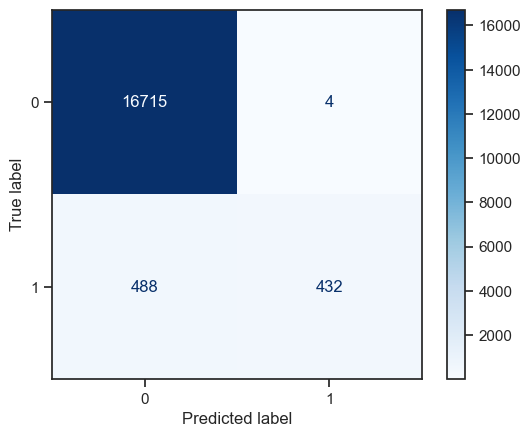

ROC AUC Score: 0.9636


In [100]:
# Rebuild the model
best_xgb = XGBClassifier(**study_xgb.best_params, use_label_encoder=False, eval_metric='logloss')
best_xgb.fit(X_train_scaled, y_train)

# Predict
y_pred_bo_xgb = best_xgb.predict(X_test_scaled)
y_proba_xgb = best_xgb.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bo_xgb))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_bo_xgb)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.show()

roc_auc = roc_auc_score(y_test, y_proba_xgb)
print(f"ROC AUC Score: {roc_auc:.4f}")


In [101]:
evaluate_model(y_test, y_pred_bo_xgb, 'XGBoost With New Params')

--- XGBoost With New Params ---
Accuracy: 0.9721
Precision: 0.9908
Recall: 0.4696
F1-Score: 0.6372
ROC-AUC: 0.7347
Confusion Matrix:
[[16715     4]
 [  488   432]]


#### Random Forest

In [102]:
def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    }

    model = RandomForestClassifier(**params, random_state=42)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    return accuracy_score(y_test, preds)


In [103]:
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=20)

print("Best Accuracy:", study_rf.best_value)
print("Best Hyperparameters:", study_rf.best_params)


[I 2025-06-03 23:14:36,947] A new study created in memory with name: no-name-2e19e0c2-fafe-49ab-b94e-ee37fdde713d
[I 2025-06-03 23:14:58,723] Trial 0 finished with value: 0.9715403367537843 and parameters: {'n_estimators': 176, 'max_depth': 15, 'max_features': None}. Best is trial 0 with value: 0.9715403367537843.
[I 2025-06-03 23:15:06,558] Trial 1 finished with value: 0.9718804920913884 and parameters: {'n_estimators': 256, 'max_depth': 6, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.9718804920913884.
[I 2025-06-03 23:15:24,260] Trial 2 finished with value: 0.97120018141618 and parameters: {'n_estimators': 146, 'max_depth': 17, 'max_features': None}. Best is trial 1 with value: 0.9718804920913884.
[I 2025-06-03 23:15:33,674] Trial 3 finished with value: 0.9718804920913884 and parameters: {'n_estimators': 256, 'max_depth': 7, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.9718804920913884.
[I 2025-06-03 23:15:35,690] Trial 4 finished with value: 0.9684789387153466 an

Best Accuracy: 0.9718804920913884
Best Hyperparameters: {'n_estimators': 256, 'max_depth': 6, 'max_features': 'sqrt'}


### Applied New Parameter Suggested by Bayesian Optimization process (Random Forest)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     16719
           1       1.00      0.46      0.63       920

    accuracy                           0.97     17639
   macro avg       0.99      0.73      0.81     17639
weighted avg       0.97      0.97      0.97     17639

Confusion Matrix:


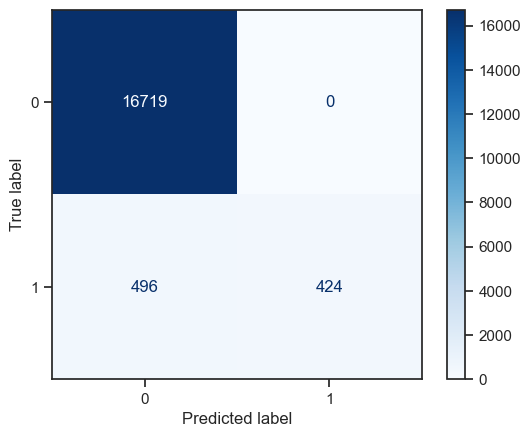

ROC AUC Score: 0.9359


In [104]:
# Rebuild the best model
best_rf = RandomForestClassifier(**study_rf.best_params, random_state=42)
best_rf.fit(X_train_scaled, y_train)

# Predict
y_pred_bo_rf = best_rf.predict(X_test_scaled)
y_proba_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bo_rf))

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_bo_rf)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.show()

# ROC AUC Score
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"ROC AUC Score: {roc_auc_rf:.4f}")


In [105]:
evaluate_model(y_test, y_pred_bo_rf, "Random Forest with Best Params")

--- Random Forest with Best Params ---
Accuracy: 0.9719
Precision: 1.0000
Recall: 0.4609
F1-Score: 0.6310
ROC-AUC: 0.7304
Confusion Matrix:
[[16719     0]
 [  496   424]]


#### ANN

In [106]:
def create_model(trial):
    # Hyperparameters to optimize
    n_hidden = trial.suggest_int("n_hidden", 1, 3)  # number of hidden layers
    hidden_units = trial.suggest_categorical("hidden_units", [32, 64, 128])
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)

    model = Sequential()
    model.add(Dense(hidden_units, input_dim=X_train_scaled.shape[1], activation='relu'))

    for _ in range(n_hidden - 1):
        model.add(Dense(hidden_units, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [ ]:
def objective(trial):
    model = create_model(trial)

    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
    epochs = trial.suggest_int("epochs", 10, 100)

    history = model.fit(X_train_scaled, y_train,
                        validation_split=0.2,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0)

    val_acc = history.history['val_accuracy'][-1]
    return val_acc


In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

print("Best Trial:")
print("  Value: {:.4f}".format(study.best_trial.value))
print("  Params: ")
for key, value in study.best_trial.params.items():
    print(f"    {key}: {value}")


[I 2025-06-03 23:18:10,992] A new study created in memory with name: no-name-04223be0-7174-47d4-8e1e-6f3512e636e9
[I 2025-06-03 23:23:39,645] Trial 0 finished with value: 0.9728599786758423 and parameters: {'n_hidden': 1, 'hidden_units': 32, 'learning_rate': 0.003972886964369302, 'batch_size': 32, 'epochs': 70}. Best is trial 0 with value: 0.9728599786758423.
[I 2025-06-03 23:26:02,587] Trial 1 finished with value: 0.9725056886672974 and parameters: {'n_hidden': 3, 'hidden_units': 32, 'learning_rate': 0.00031283026624863837, 'batch_size': 64, 'epochs': 56}. Best is trial 0 with value: 0.9728599786758423.
[I 2025-06-04 07:55:55,539] Trial 2 finished with value: 0.9736394286155701 and parameters: {'n_hidden': 2, 'hidden_units': 64, 'learning_rate': 0.00822875186062744, 'batch_size': 32, 'epochs': 45}. Best is trial 2 with value: 0.9736394286155701.
[I 2025-06-04 07:59:37,967] Trial 3 finished with value: 0.9704506993293762 and parameters: {'n_hidden': 3, 'hidden_units': 32, 'learning_rat

### Applied New Parameter Suggested by Bayesian Optimization process (ANN)

In [ ]:
best_params = study.best_trial.params

final_model = Sequential()
final_model.add(Dense(best_params['hidden_units'], input_dim=X_train_scaled.shape[1], activation='relu'))

for _ in range(best_params['n_hidden'] - 1):
    final_model.add(Dense(best_params['hidden_units'], activation='relu'))

final_model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=best_params['learning_rate'])
final_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

final_model.fit(X_train_scaled, y_train,
                batch_size=best_params['batch_size'],
                epochs=best_params['epochs'],
                verbose=1,
                validation_split=0.2)


Epoch 1/87
3528/3528 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9522 - loss: 0.1522 - val_accuracy: 0.9600 - val_loss: 0.1127
Epoch 2/87
3528/3528 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9604 - loss: 0.1117 - val_accuracy: 0.9642 - val_loss: 0.1035
Epoch 3/87
3528/3528 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9640 - loss: 0.1052 - val_accuracy: 0.9702 - val_loss: 0.0906
Epoch 4/87
3528/3528 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9670 - loss: 0.0984 - val_accuracy: 0.9700 - val_loss: 0.0921
Epoch 5/87
3528/3528 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9693 - loss: 0.0910 - val_accuracy: 0.9724 - val_loss: 0.0864
Epoch 6/87
3528/3528 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9697 - loss: 0.0889 - val_accuracy: 0.9712 - val_loss: 0.0859
Epoch 7/87
3528/3528 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9694 - loss: 0.0885 - val_accuracy: 0.9631 - val_loss: 0.1067
Epoch 8/87
3528/3528 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9703 - loss: 0

In [ ]:
y_pred_bo_ann = (final_model.predict(X_test_scaled) > 0.5).astype("int32")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_bo_ann))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bo_ann))

# ROC AUC
y_proba_ann = final_model.predict(X_test_scaled).ravel()
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_ann))


552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     16719
           1       0.93      0.38      0.54       920

    accuracy                           0.97     17639
   macro avg       0.95      0.69      0.76     17639
weighted avg       0.97      0.97      0.96     17639

Confusion Matrix:
[[16693    26]
 [  571   349]]
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
ROC AUC Score: 0.9531809682813357


In [ ]:
evaluate_model(y_test, y_pred_bo_ann, "ANN with Best Params")

--- ANN with Best Params ---
Accuracy: 0.9662
Precision: 0.9307
Recall: 0.3793
F1-Score: 0.5390
ROC-AUC: 0.6889
Confusion Matrix:
[[16693    26]
 [  571   349]]


## Shape and Lime

100%|===================| 17609/17639 [01:48<00:00]        

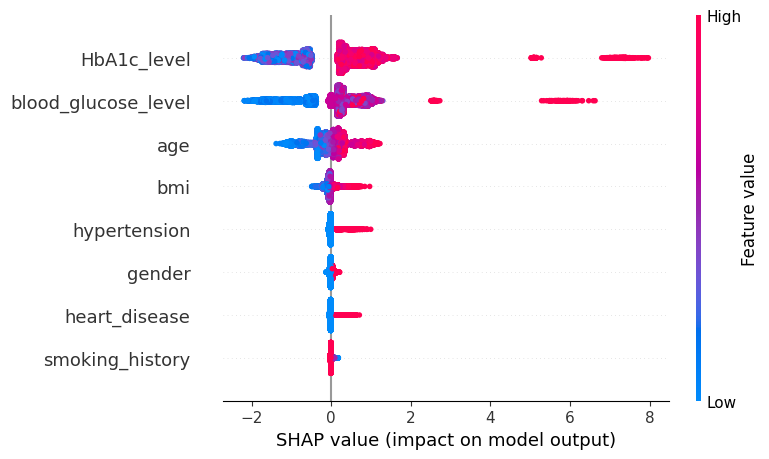

In [ ]:
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# SHAP for XGBoost
explainer_xgb = shap.Explainer(best_xgb, X_train_scaled)
shap_values_xgb = explainer_xgb(X_test_scaled)

# Summary plot
shap.summary_plot(shap_values_xgb, X_test_scaled, feature_names=X.columns)

# LIME for XGBoost
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=X.columns.tolist(),
    class_names=['No Diabetes', 'Diabetes'],
    mode='classification'
)

i = 5  # example test instance
exp = lime_explainer.explain_instance(X_test_scaled[i], best_xgb.predict_proba, num_features=10)
exp.show_in_notebook()


100%|===================| 35237/35278 [02:57<00:00]        

<Figure size 1200x600 with 0 Axes>

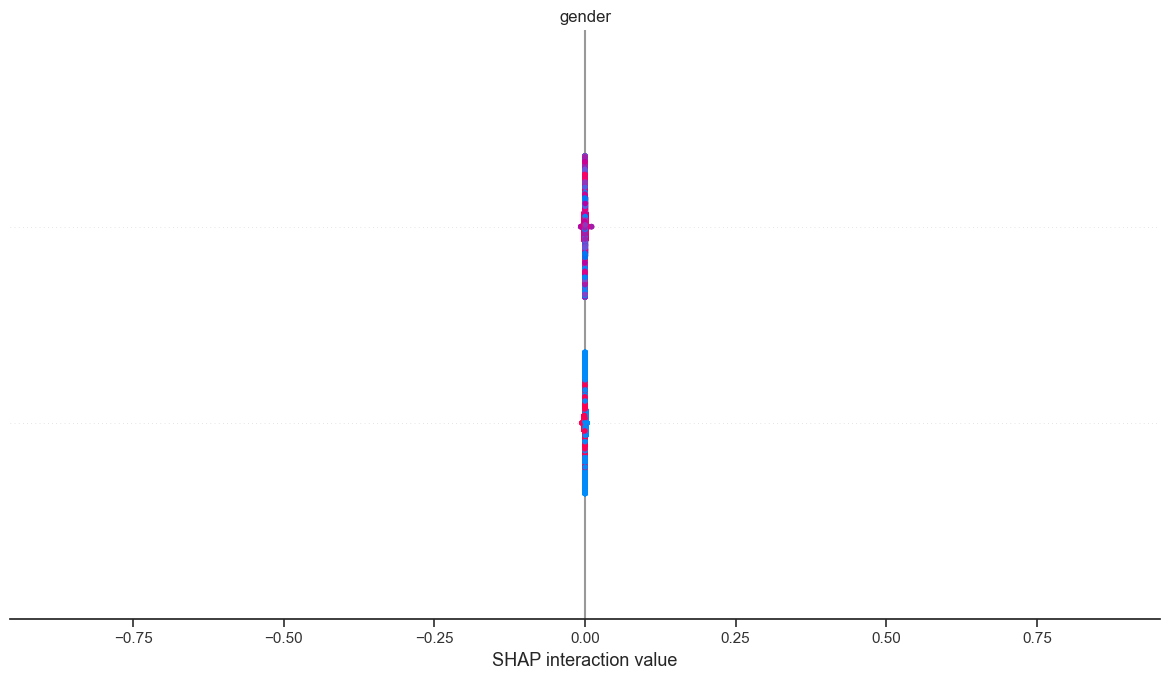

In [ ]:
import shap
import matplotlib.pyplot as plt

# Create SHAP explainer for Random Forest
explainer_rf = shap.Explainer(best_rf, X_train_scaled)
shap_values_rf = explainer_rf(X_test_scaled, check_additivity=False)

# Set figure size for better visibility
plt.figure(figsize=(12, 6))  # Wider and taller
shap.summary_plot(shap_values_rf, X_test_scaled, feature_names=X.columns)


<Figure size 640x480 with 0 Axes>

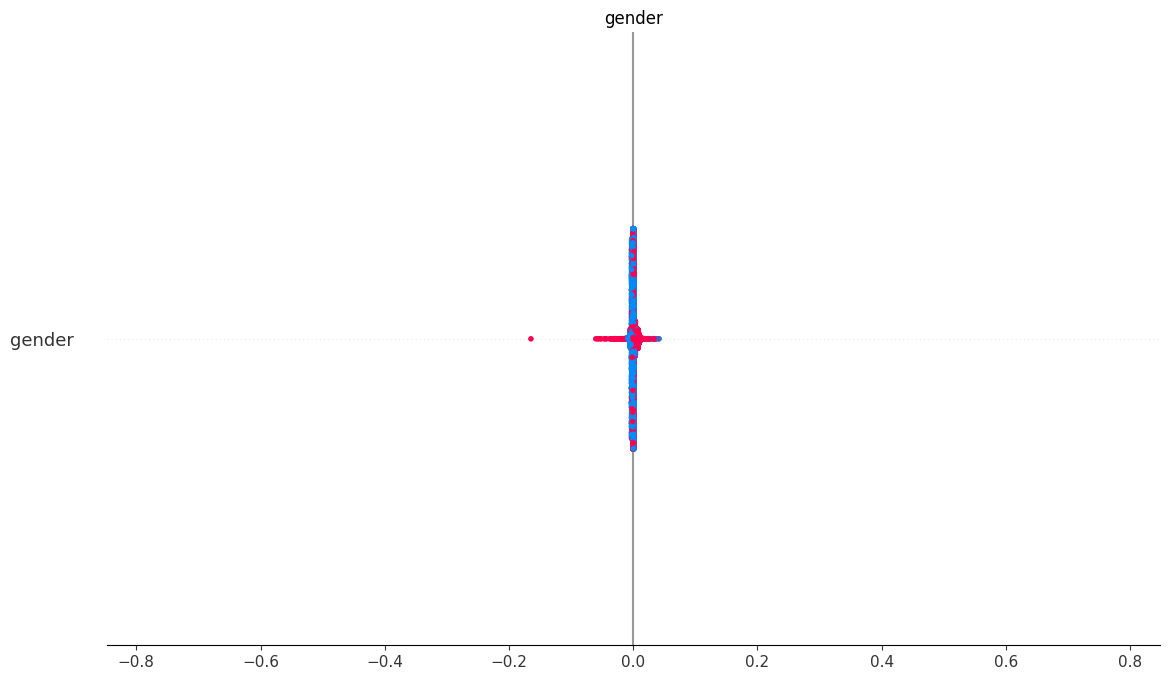

In [ ]:
import shap
import matplotlib.pyplot as plt

# Create SHAP DeepExplainer for ANN
explainer_ann = shap.DeepExplainer(final_model, X_train_scaled[:100])  # Use subset for performance
shap_values_ann = explainer_ann.shap_values(X_test_scaled[:100])

# If shap_values_ann is a list (binary classification), extract the array
if isinstance(shap_values_ann, list):
    shap_values_ann = shap_values_ann[0]

# Set figure size before plotting
plt.figure(figsize=(12, 6))  # Adjust as needed
shap.summary_plot(shap_values_ann, X_test_scaled[:100], feature_names=X.columns)


In [ ]:
accuracy_score(y_test , y_pred_xgb)

0.9720505697601904

In [ ]:
accuracy_score(y_test, y_pred_bo_xgb)

0.9720505697601904

In [ ]:
# # Import metrics
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# # Prepare metrics dictionary
# results = {
#     'RF': {
#         'Accuracy': accuracy_score(y_test, y_pred_rf),
#         'Precision': precision_score(y_test, y_pred_rf),
#         'Recall': recall_score(y_test, y_pred_rf),
#         'F1 Score': f1_score(y_test, y_pred_rf),
#         'ROC AUC': roc_auc_score(y_test, y_pred_rf)
#     },
#     'XGB': {
#         'Accuracy': accuracy_score(y_test, y_pred_xgb),
#         'Precision': precision_score(y_test, y_pred_xgb),
#         'Recall': recall_score(y_test, y_pred_xgb),
#         'F1 Score': f1_score(y_test, y_pred_xgb),
#         'ROC AUC': roc_auc_score(y_test, y_pred_xgb)
#     },
#     'ANN': {
#         'Accuracy': accuracy_score(y_test, y_pred_ann),
#         'Precision': precision_score(y_test, y_pred_ann),
#         'Recall': recall_score(y_test, y_pred_ann),
#         'F1 Score': f1_score(y_test, y_pred_ann),
#         'ROC AUC': roc_auc_score(y_test, y_pred_ann)
#     },
#     'BO_RF': {
#         'Accuracy': accuracy_score(y_test, y_pred_bo_rf),
#         'Precision': precision_score(y_test, y_pred_bo_rf),
#         'Recall': recall_score(y_test, y_pred_bo_rf),
#         'F1 Score': f1_score(y_test, y_pred_bo_rf),
#         'ROC AUC': roc_auc_score(y_test, y_pred_bo_rf)
#     },
#     'BO_XGB': {
#         'Accuracy': accuracy_score(y_test, y_pred_bo_xgb),
#         'Precision': precision_score(y_test, y_pred_bo_xgb),
#         'Recall': recall_score(y_test, y_pred_bo_xgb),
#         'F1 Score': f1_score(y_test, y_pred_bo_xgb),
#         'ROC AUC': roc_auc_score(y_test, y_pred_bo_xgb)
#     },
#     'BO_ANN': {
#         'Accuracy': accuracy_score(y_test, y_pred_bo_ann),
#         'Precision': precision_score(y_test, y_pred_bo_ann),
#         'Recall': recall_score(y_test, y_pred_bo_ann),
#         'F1 Score': f1_score(y_test, y_pred_bo_ann),
#         'ROC AUC': roc_auc_score(y_test, y_pred_bo_ann)
#     }
# }

# # Convert to DataFrame
# import pandas as pd
# metrics_df = pd.DataFrame(results).T.reset_index().rename(columns={"index": "Model"})


In [ ]:
precision_score(y_test, y_pred_xgb)

0.9908045977011494

In [ ]:
precision_score(y_test, y_pred_bo_xgb)

0.9908045977011494

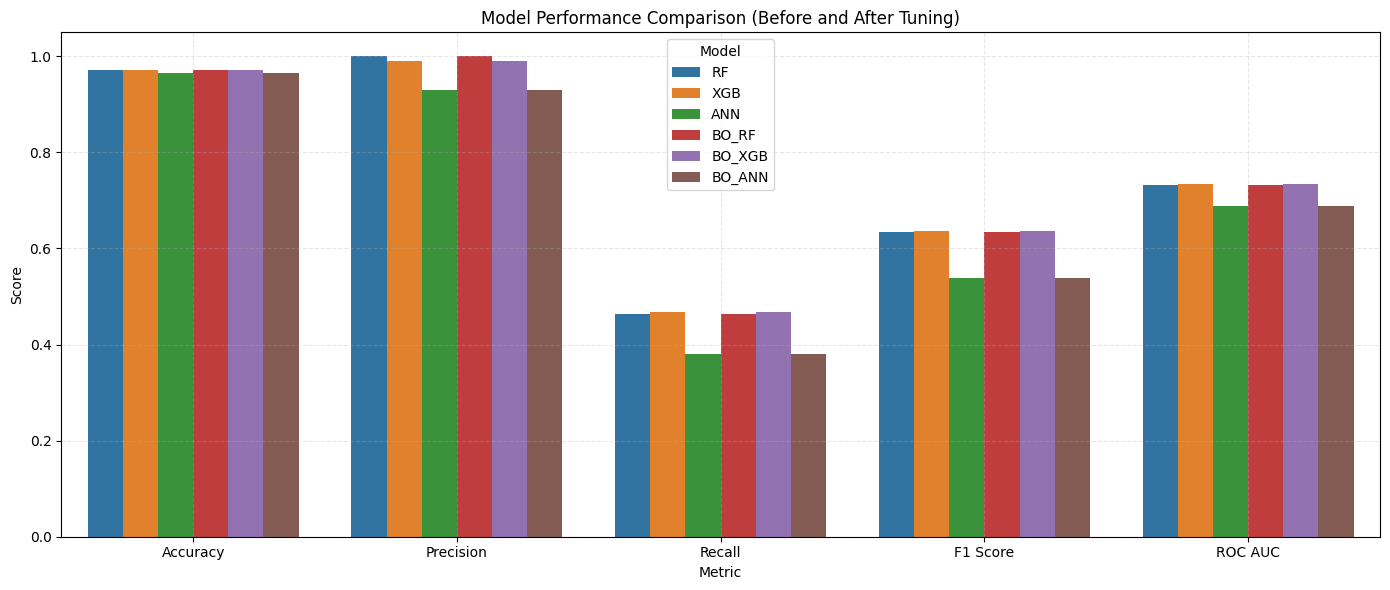

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Melt the dataframe for seaborn
# melted_df = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# plt.figure(figsize=(14, 6))
# sns.barplot(data=melted_df, x='Metric', y='Score', hue='Model')
# plt.title('Model Performance Comparison (Before and After Tuning)')
# plt.ylim(0, 1.05)
# plt.xticks(rotation=0)
# plt.grid(True, linestyle='--', alpha=0.3)
# plt.tight_layout()
# plt.show()


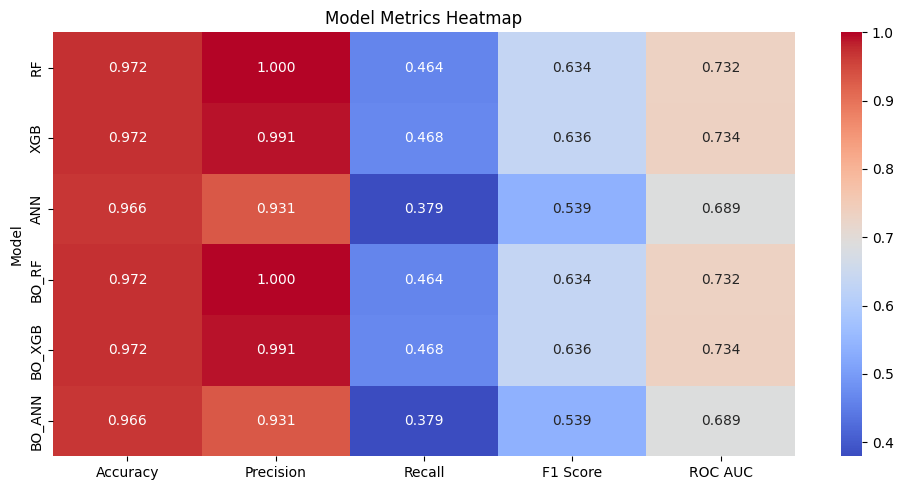

In [ ]:
# plt.figure(figsize=(10, 5))
# sns.heatmap(metrics_df.set_index('Model'), annot=True, fmt='.3f', cmap='coolwarm')
# plt.title('Model Metrics Heatmap')
# plt.tight_layout()
# plt.show()


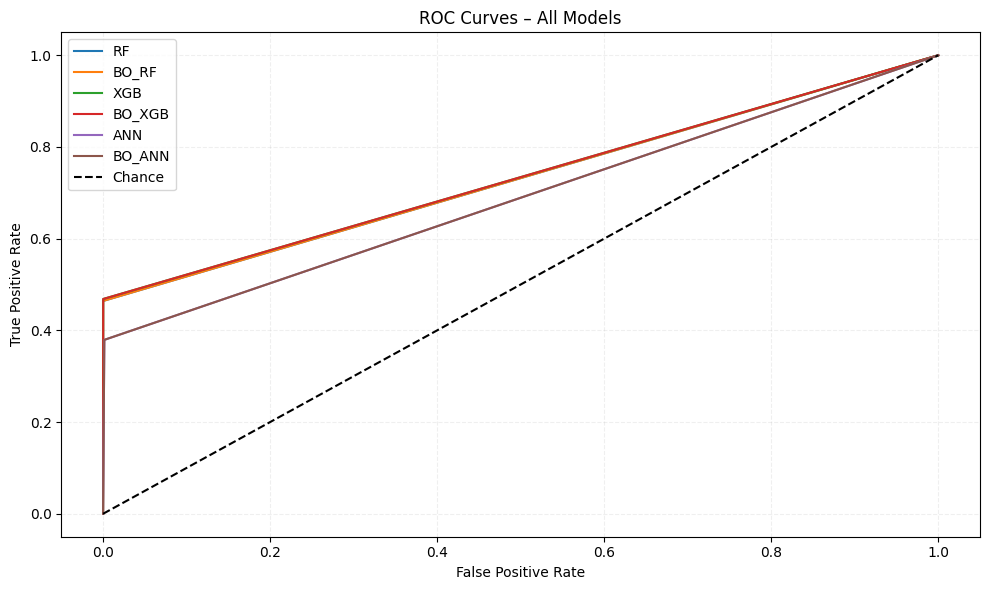

In [ ]:
# # Plot ROC curves
# plt.figure(figsize=(10, 6))

# # Get FPR/TPR for each
# fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
# fpr_bo_rf, tpr_bo_rf, _ = roc_curve(y_test, y_pred_bo_rf)

# fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)
# fpr_bo_xgb, tpr_bo_xgb, _ = roc_curve(y_test, y_pred_bo_xgb)

# fpr_ann, tpr_ann, _ = roc_curve(y_test, y_pred_ann)
# fpr_bo_ann, tpr_bo_ann, _ = roc_curve(y_test, y_pred_bo_ann)

# # Plot
# plt.plot(fpr_rf, tpr_rf, label='RF')
# plt.plot(fpr_bo_rf, tpr_bo_rf, label='BO_RF')

# plt.plot(fpr_xgb, tpr_xgb, label='XGB')
# plt.plot(fpr_bo_xgb, tpr_bo_xgb, label='BO_XGB')

# plt.plot(fpr_ann, tpr_ann, label='ANN')
# plt.plot(fpr_bo_ann, tpr_bo_ann, label='BO_ANN')

# # Reference line
# plt.plot([0, 1], [0, 1], 'k--', label='Chance')

# plt.title('ROC Curves – All Models')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend()
# plt.grid(True, linestyle='--', alpha=0.5)
# plt.tight_layout()
# plt.show()


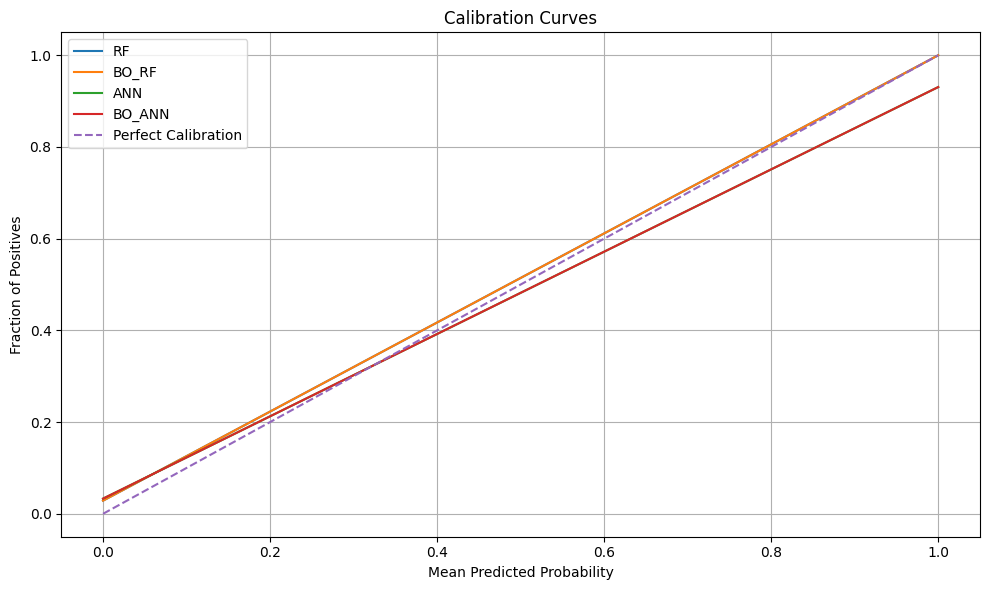

In [ ]:
# from sklearn.calibration import calibration_curve

# plt.figure(figsize=(10, 6))

# # RF
# prob_true_rf, prob_pred_rf = calibration_curve(y_test, y_pred_rf, n_bins=10)
# plt.plot(prob_pred_rf, prob_true_rf, label='RF')

# # BO_RF
# prob_true_bo_rf, prob_pred_bo_rf = calibration_curve(y_test, y_pred_bo_rf, n_bins=10)
# plt.plot(prob_pred_bo_rf, prob_true_bo_rf, label='BO_RF')

# # ANN
# prob_true_ann, prob_pred_ann = calibration_curve(y_test, y_pred_ann, n_bins=10)
# plt.plot(prob_pred_ann, prob_true_ann, label='ANN')

# # BO_ANN
# prob_true_bo_ann, prob_pred_bo_ann = calibration_curve(y_test, y_pred_bo_ann, n_bins=10)
# plt.plot(prob_pred_bo_ann, prob_true_bo_ann, label='BO_ANN')

# # Reference
# plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration')
# plt.title('Calibration Curves')
# plt.xlabel('Mean Predicted Probability')
# plt.ylabel('Fraction of Positives')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [ ]:
# # from sklearn.metrics import confusion_matrix
# # import seaborn as sns
# # import matplotlib.pyplot as plt

# # models = {
# #     'RF': y_pred_rf,
# #     'XGB': y_pred_xgb,
# #     'ANN': y_pred_ann,
# #     'BO_RF': y_pred_bo_rf,
# #     'BO_XGB': y_pred_bo_xgb,
# #     'BO_ANN': y_pred_bo_ann
# # }

# # fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# # for ax, (model_name, preds) in zip(axes.flat, models.items()):
# #     cm = confusion_matrix(y_test, preds)
# #     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
# #     ax.set_title(f'Confusion Matrix: {model_name}')
# #     ax.set_xlabel('Predicted')
# #     ax.set_ylabel('Actual')

# # plt.tight_layout()
# # plt.show()

# print("RF accuracy:", confusion_matrix(y_test, y_pred_rf))
# print("XGB accuracy:", confusion_matrix(y_test, y_pred_xgb))
# print("ANN accuracy:", confusion_matrix(y_test, y_pred_ann))


# print("RF accuracy:", confusion_matrix(y_test, y_pred_bo_rf))
# print("XGB accuracy:", confusion_matrix(y_test, y_pred_bo_xgb))
# print("ANN accuracy:", confusion_matrix(y_test, y_pred_bo_ann))


RF accuracy: [[16719     0]
 [  493   427]]
XGB accuracy: [[16715     4]
 [  489   431]]
ANN accuracy: [[16693    26]
 [  571   349]]
RF accuracy: [[16719     0]
 [  493   427]]
XGB accuracy: [[16715     4]
 [  489   431]]
ANN accuracy: [[16693    26]
 [  571   349]]


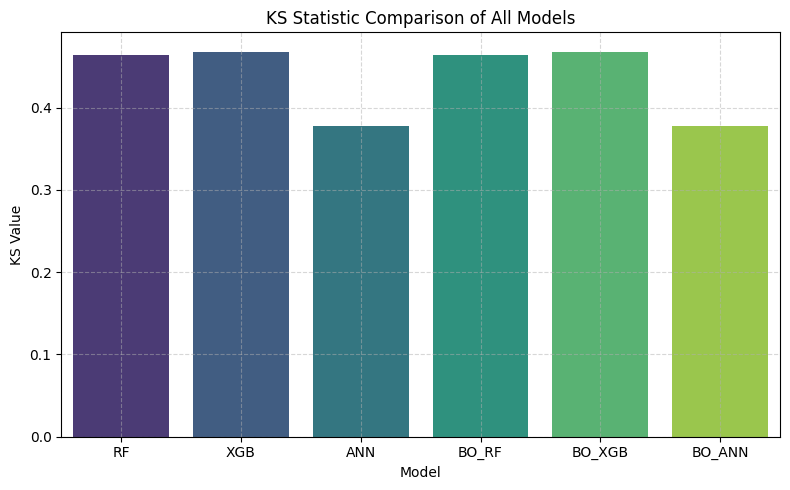

In [ ]:
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from scipy.stats import ks_2samp

# def ks_statistic(y_true, y_proba):
#     return ks_2samp(y_proba[y_true == 1], y_proba[y_true == 0]).statistic

# # Convert NumPy values to scalars explicitly
# ks_scores = {
#     'RF': float(ks_statistic(y_test.values, y_pred_rf)),
#     'XGB': float(ks_statistic(y_test.values, y_pred_xgb)),
#     'ANN': float(ks_statistic(y_test.values, y_pred_ann)),
#     'BO_RF': float(ks_statistic(y_test.values, y_pred_bo_rf)),
#     'BO_XGB': float(ks_statistic(y_test.values,y_pred_bo_xgb)),
#     'BO_ANN': float(ks_statistic(y_test.values, y_pred_bo_ann)),
# }

# # Convert to DataFrame for clean plotting
# import pandas as pd

# ks_df = pd.DataFrame(list(ks_scores.items()), columns=['Model', 'KS_Statistic'])

# # Plot using seaborn
# plt.figure(figsize=(8, 5))
# sns.barplot(data=ks_df, x='Model', y='KS_Statistic', palette='viridis')
# plt.title('KS Statistic Comparison of All Models')
# plt.ylabel('KS Value')
# plt.grid(True, linestyle='--', alpha=0.5)
# plt.tight_layout()
# plt.show()



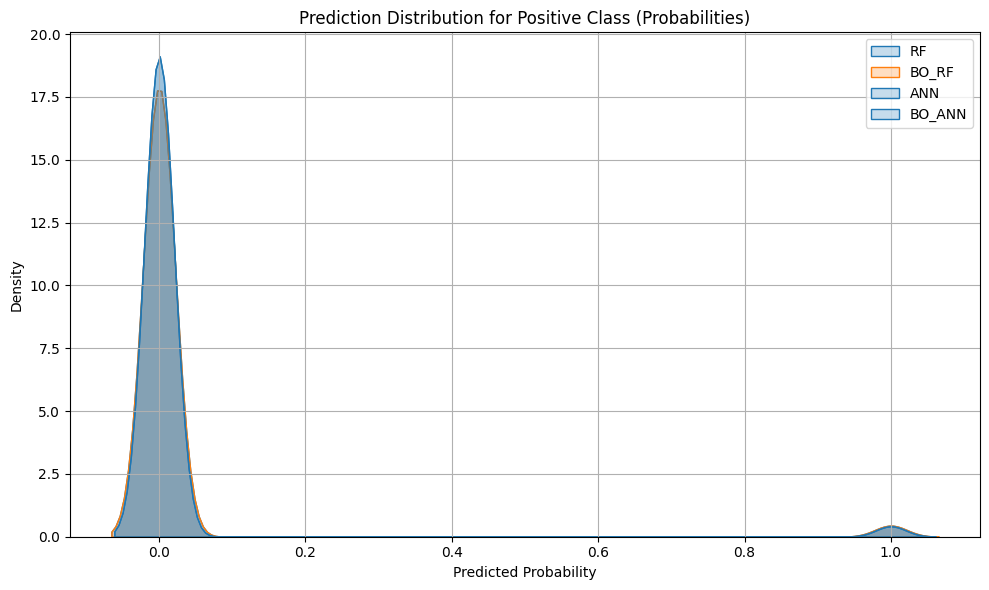

In [ ]:
# plt.figure(figsize=(10, 6))

# sns.kdeplot(y_pred_rf, label='RF', shade=True)
# sns.kdeplot(y_pred_bo_rf, label='BO_RF', shade=True)
# sns.kdeplot(y_pred_ann, label='ANN', shade=True)
# sns.kdeplot(y_pred_bo_ann, label='BO_ANN', shade=True)

# plt.title('Prediction Distribution for Positive Class (Probabilities)')
# plt.xlabel('Predicted Probability')
# plt.ylabel('Density')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()
